# **LOAN APPROVAL PREDICTION USING KNN**

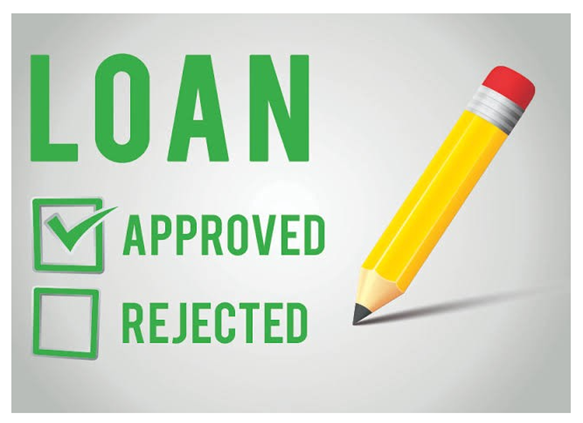

# Importing Python libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Importing Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/LoanApprovalPrediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            566 non-null    int64  
 1   Married           566 non-null    int64  
 2   Dependents        566 non-null    float64
 3   Education         566 non-null    int64  
 4   Self_Employed     566 non-null    int64  
 5   ApplicantIncome   566 non-null    int64  
 6   LoanAmount        566 non-null    float64
 7   Loan_Amount_Term  566 non-null    float64
 8   Credit_History    566 non-null    float64
 9   Property_Area     566 non-null    int64  
 10  Loan_Status       566 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 53.1 KB


In [ ]:
df.drop(columns='Loan_ID',inplace=True)

In [ ]:
df.drop(columns='CoapplicantIncome',inplace=True)

# Data Preprocessing

In [ ]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
dtype: object

In [ ]:
df.dropna(subset=['Gender','Married','Self_Employed'],inplace=True)

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Gender'].replace(['Male','Female'],[0,1],inplace=True)

In [ ]:
df['Married'].unique()
df['Married'].replace(['Yes','No'],[0,1],inplace=True)


In [ ]:
df['Dependents'].replace(['3+'],[3],inplace=True)
df['Dependents']=df['Dependents'].astype(float)

In [ ]:
df['Education'].unique()
df['Education'].replace(['Graduate', 'Not Graduate'],[0,1],inplace=True)

In [ ]:
df['Self_Employed'].replace(['Yes','No'],[0,1],inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0.0,0,1,5849,NaN,360.0,1.0,Urban,Y
1,0,0,1.0,0,1,4583,128.0,360.0,1.0,Rural,N
2,0,0,0.0,0,0,3000,66.0,360.0,1.0,Urban,Y
3,0,0,0.0,1,1,2583,120.0,360.0,1.0,Urban,Y
4,0,1,0.0,0,1,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0.0,0,1,2900,71.0,360.0,1.0,Rural,Y
610,0,0,3.0,0,1,4106,40.0,180.0,1.0,Rural,Y
611,0,0,1.0,0,1,8072,253.0,360.0,1.0,Urban,Y
612,0,0,2.0,0,1,7583,187.0,360.0,1.0,Urban,Y


In [ ]:
df['Property_Area'].unique()
df['Property_Area'].replace(['Urban', 'Rural', 'Semiurban'],[0,1,2],inplace=True)

In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [ ]:
df['Loan_Amount_Term'].value_counts()
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [ ]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mean())

In [ ]:
df['Loan_Status'].replace(['Y','N'],[0,1],inplace=True)

In [ ]:
df.shape

(566, 11)

In [ ]:
df['Gender'].value_counts()

Gender
0    463
1    103
Name: count, dtype: int64

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

# Visualization

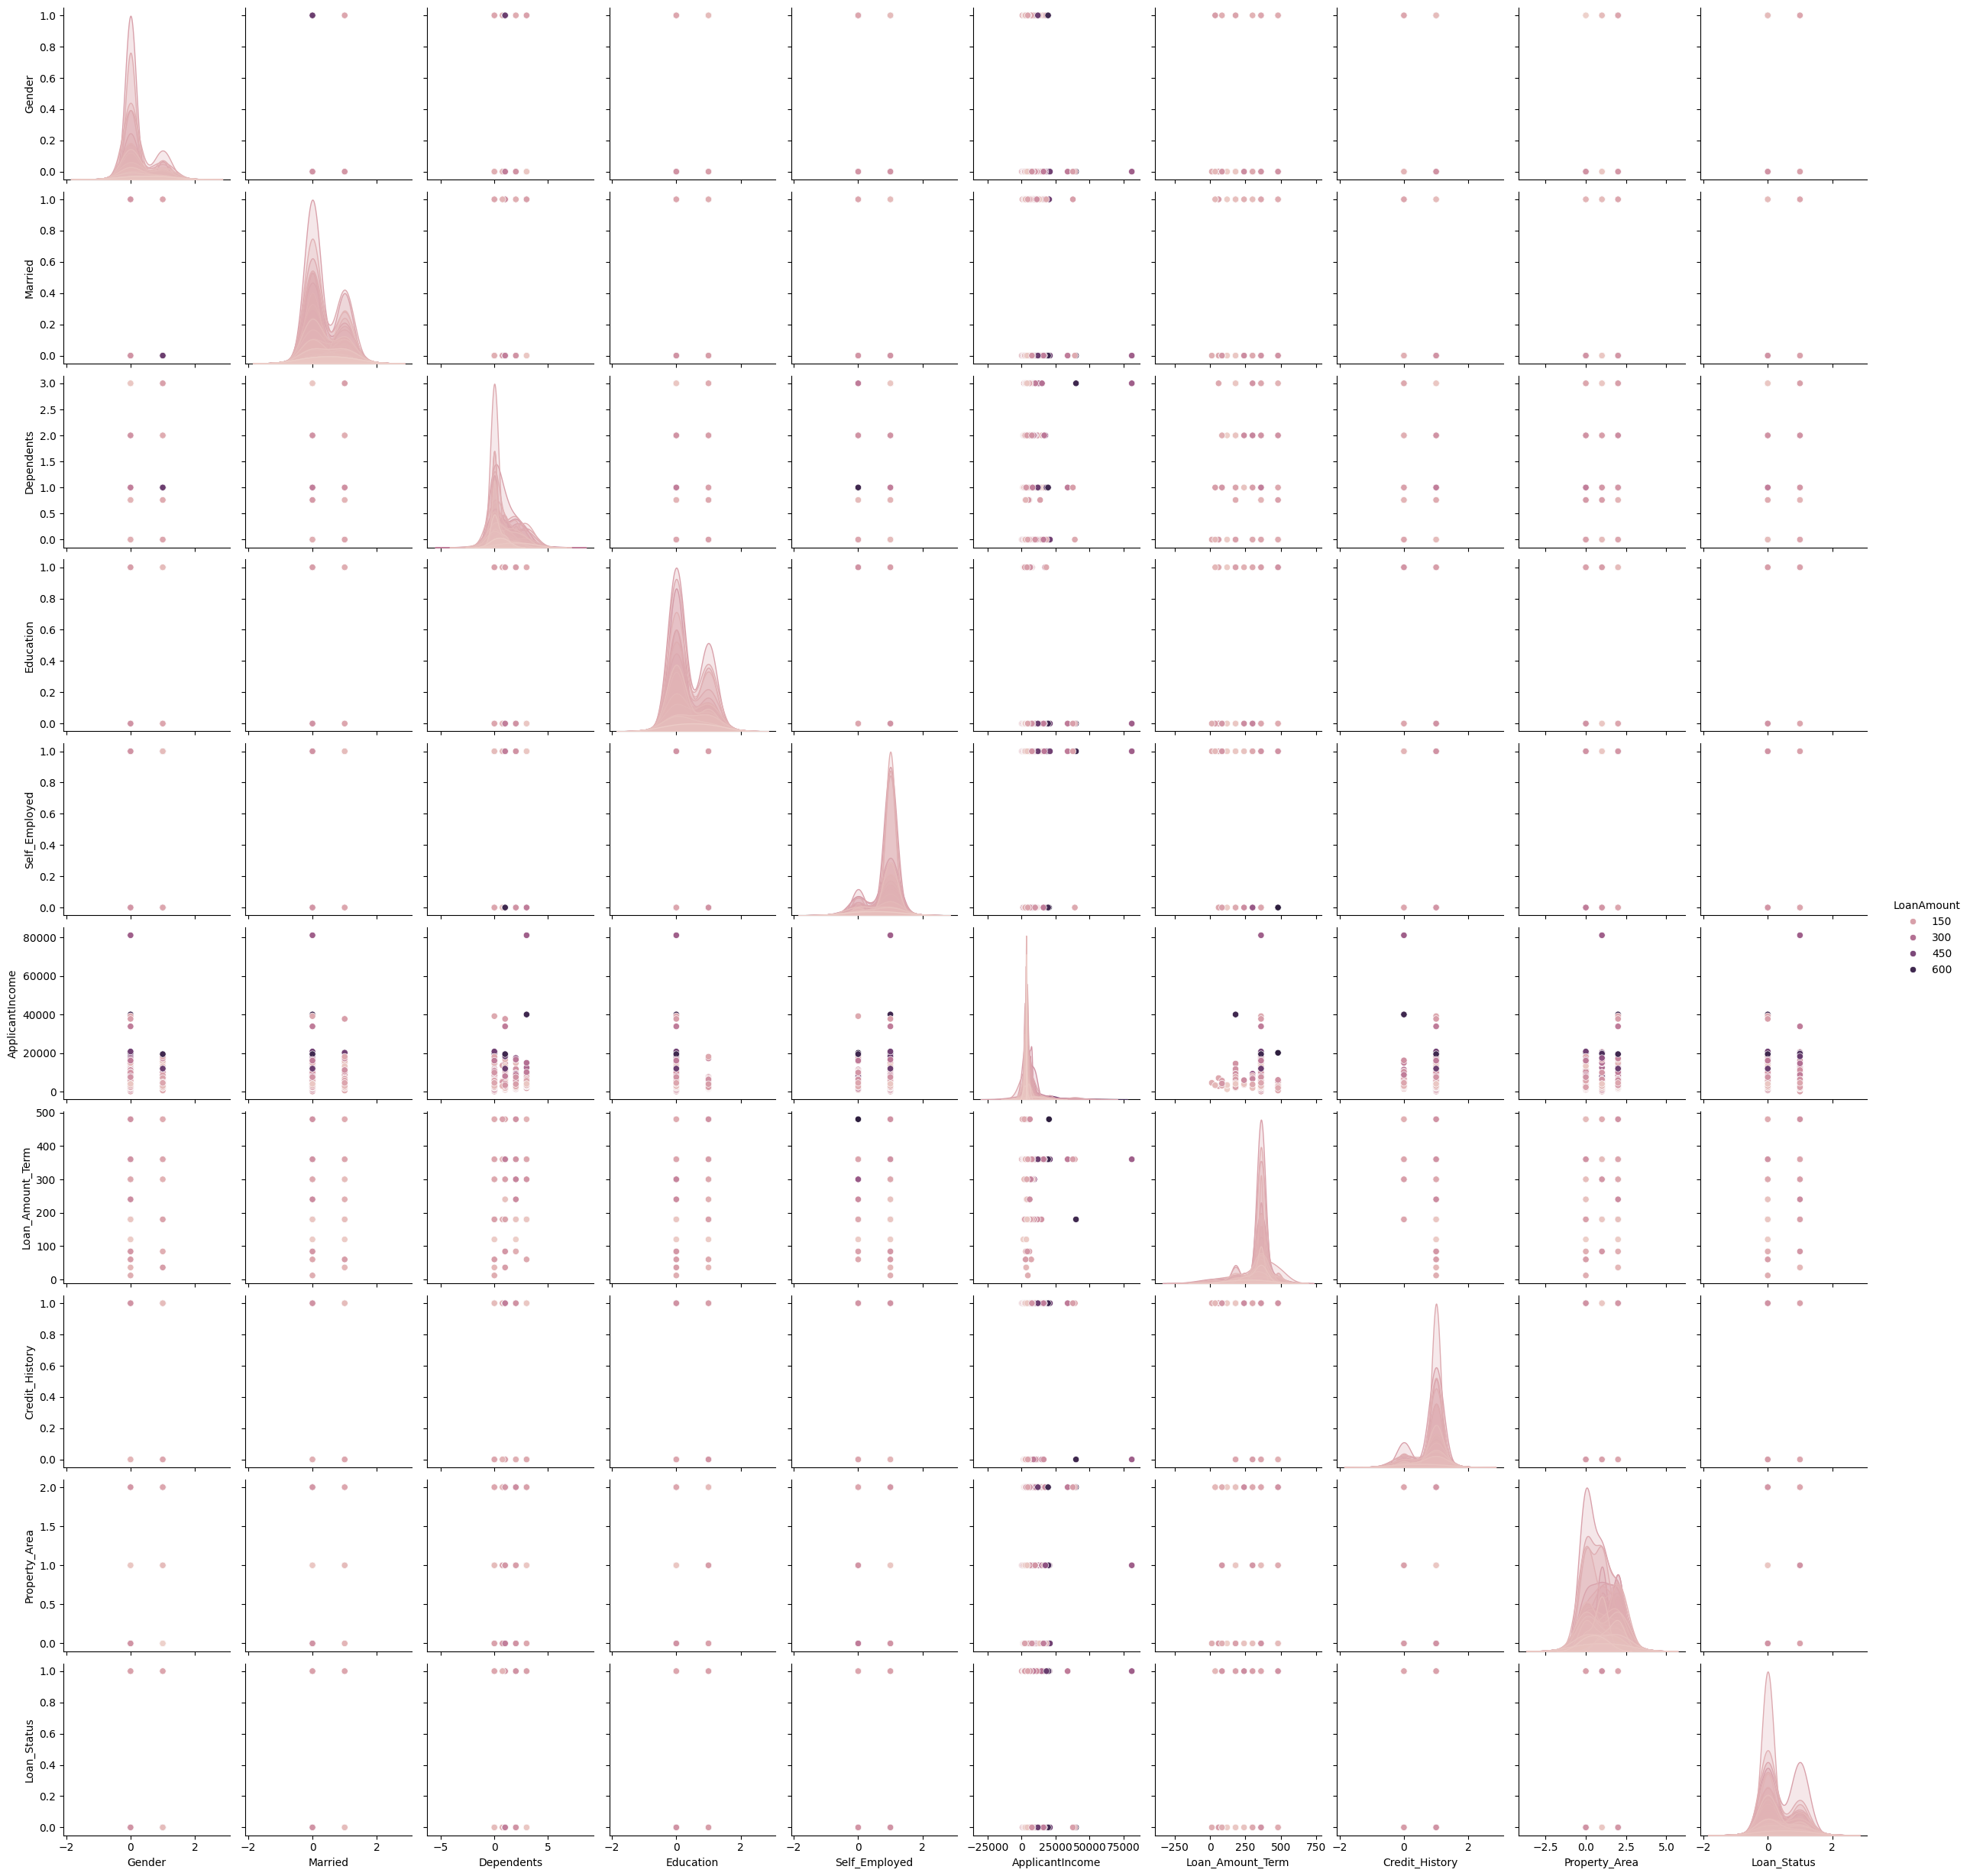

In [ ]:
sns.pairplot(df,hue='LoanAmount',kind='scatter')
plt.show()

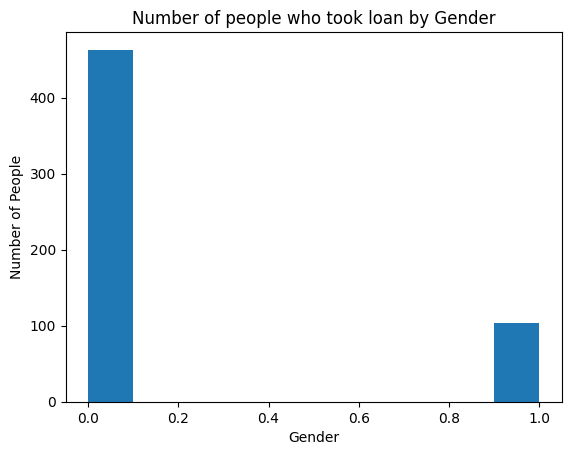

In [ ]:
plt.hist(df['Gender'].to_list())
plt.title('Number of people who took loan by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.show()


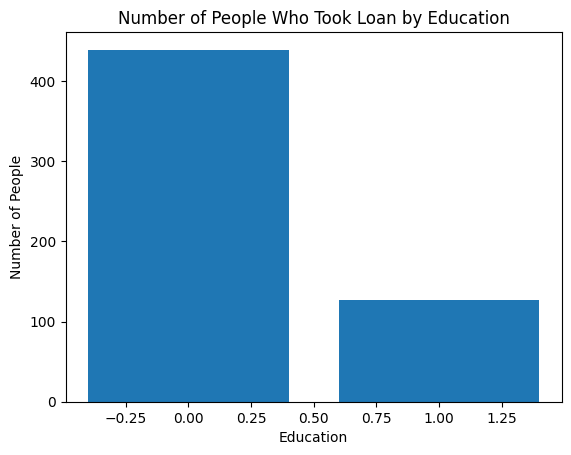

In [ ]:
#Number of people who took loan by Education
education_counts = df['Education'].value_counts()
plt.title('Number of People Who Took Loan by Education')
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education')
plt.ylabel('Number of People')
plt.show()


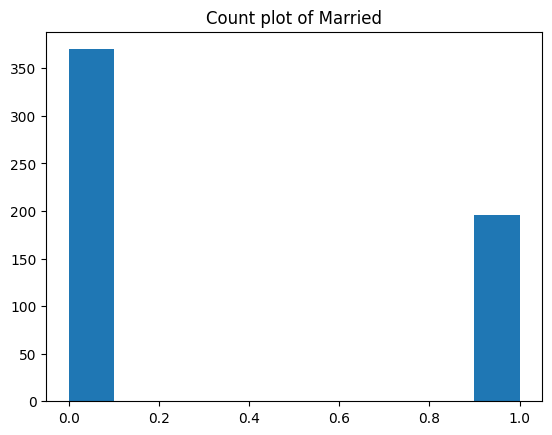

In [ ]:
plt.hist(df['Married'].to_list())
plt.title('Count plot of Married')
plt.show()

In [ ]:
df.dtypes
df.shape

(566, 11)

# Seperating Features and Target

In [ ]:
x=df.drop(columns='Loan_Status')
y=df['Loan_Status']

# Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
181,0,1,0.0,0,1,1916,67.000000,360.0,1.0,1
559,1,0,0.0,0,1,4180,182.000000,360.0,1.0,2
603,0,1,0.0,0,1,3676,172.000000,360.0,1.0,1
488,0,0,2.0,0,0,4583,160.000000,360.0,1.0,2
251,1,1,2.0,0,1,3427,138.000000,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
322,0,0,2.0,1,1,3601,144.472527,360.0,1.0,1
577,0,1,0.0,0,1,3229,110.000000,360.0,1.0,0
533,0,1,1.0,0,1,11250,196.000000,360.0,1.0,2
569,0,0,0.0,0,1,3166,104.000000,360.0,0.0,0


# Scaling

In [ ]:
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=19,weights='uniform')
knn.fit(x_train_scaled,y_train)
knn.score(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.6919191919191919

In [ ]:
y_pred=knn.predict(x_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test.values

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.77      0.98      0.86       114
           1       0.92      0.39      0.55        56

    accuracy                           0.79       170
   macro avg       0.84      0.69      0.71       170
weighted avg       0.82      0.79      0.76       170



In [ ]:
print(accuracy_score(y_test,y_pred)*100)

78.82352941176471


In [ ]:
x_scaled=ss.transform(x)

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV # to find best parameters
gs=GridSearchCV(KNeighborsClassifier(),           # model
                {'n_neighbors':[i for i in range(1,30,2)],
                 'weights':['uniform','distance']},cv=5)
gs.fit(x_scaled,y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']})

In [ ]:
gs.best_params_

{'n_neighbors': 19, 'weights': 'uniform'}

In [ ]:
gs.best_score_

0.8020804222946747

In [ ]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001430,0.000389,0.008504,0.001588,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.728070,0.690265,0.690265,0.699115,0.690265,0.699596,0.014644,29
1,0.001274,0.000303,0.002164,0.000363,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.728070,0.690265,0.690265,0.699115,0.690265,0.699596,0.014644,29
2,0.001110,0.000046,0.007714,0.000555,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.736842,0.743363,0.752212,0.752212,0.778761,0.752678,0.014271,27
3,0.001124,0.000057,0.002156,0.000070,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.745614,0.743363,0.743363,0.734513,0.734513,0.740273,0.004774,28
4,0.001257,0.000225,0.007705,0.000311,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.789474,0.725664,0.743363,0.796460,0.761062,0.763204,0.026846,24
5,0.001131,0.000162,0.002811,0.000873,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.780702,0.716814,0.761062,0.769912,0.752212,0.756140,0.021813,26
6,0.001233,0.000369,0.007716,0.000479,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.815789,0.707965,0.761062,0.814159,0.769912,0.773777,0.039758,23
7,0.001026,0.000030,0.002307,0.000066,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.789474,0.699115,0.761062,0.796460,0.743363,0.757895,0.035102,25
8,0.001400,0.000394,0.009364,0.001873,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.833333,0.769912,0.787611,0.823009,0.778761,0.798525,0.025058,7
9,0.001232,0.000378,0.002448,0.000150,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.807018,0.752212,0.769912,0.796460,0.752212,0.775563,0.022577,22


In [ ]:
rs=RandomizedSearchCV(KNeighborsClassifier(),
                      {'n_neighbors':[i for i in range(1,30,2)],
                       'weights':['uniform','distance']},cv=5,n_iter=4)
rs.fit(x_scaled,y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=4,
                   param_distributions={'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19, 21, 23, 25,
                                                        27, 29],
                                        'weights': ['uniform', 'distance']})

In [ ]:
rs.best_params_

{'weights': 'uniform', 'n_neighbors': 19}